In [1]:
#reading an excel file of adult analysis data and producing/saving the following plots

In [23]:
adult_data = '/home/tli_project/Desktop/Data/T4/neurons/output/New/'
tli_data = '/home/tli_project/Desktop/Data/T4/neurons/output/New/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/fig3_1/'
# viloin_plots_to_do = ['volume','density_3D', 'area', 'convexity_3D',
#                         'circularity','AP_spread','DV_spread',
#                         'surface_area','asymmetry']
# line_plots_to_do = ['PCA_xy','PCA_shift_centroid']
plot_cols = ['volume', 'net_area', 'area',
                'AP_spread', 'DV_spread',
                'density_2D', 'density_3D', 'object_perimeter', 'convex_perimeter', 
                'circularity', 'compactness', 'surface_area',
                'eccentricity', 'convexity_2D', 'convexity_3D', 'orientation',
                'feret_diameter_max',
                'DGI', 'cen_EP_dis', 'cen_EP_angle',
                'asymmetry', 'x_asymmetry', 'y_asymmetry', 'PC1_asymmetry', 'PC2_asymmetry']

In [19]:
# plotting settings
Colors = {'A':'b','B':'g','C':'orange','D':'r'}

In [20]:
import utils.datautils as datautils
from tqdm import tqdm
import os
from os import path
import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [ ]:
# read adult CSV file
plot_col = 'DV_spread'
results_df = pd.read_csv(adult_data, index_col=0, usecols=['neuron','subtype',plot_col])
results_df['age'] = ['adult' for i in range(len(results_df))]

In [ ]:
results_df.index = results_df['neuron']

In [ ]:
# loading TLI_data
output_files = datautils.get_file_names(tli_data, group_by='_', order=True, nested_files=False, criteria='.csv')
Colors = {'A':'teal','B':'teal','C':'orange','D':'orange'}
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    subtype = neu_name[-1]
    results_df[neu_name] = [neu_name, subtype, temp_df.loc[80,plot_col], 'TLI']


In [ ]:
results_df.head()

In [ ]:
sns.violinplot(data=results_df, x="subtype", y=plot_col, hue="age", split=True)

In [21]:
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N2_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220127_P36_N1_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N3_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N2_sA.csv']


/tmp/ipykernel_790371/1058634103.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)


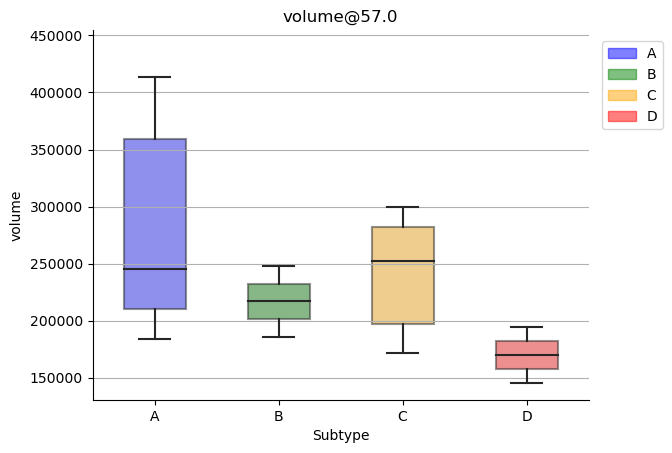

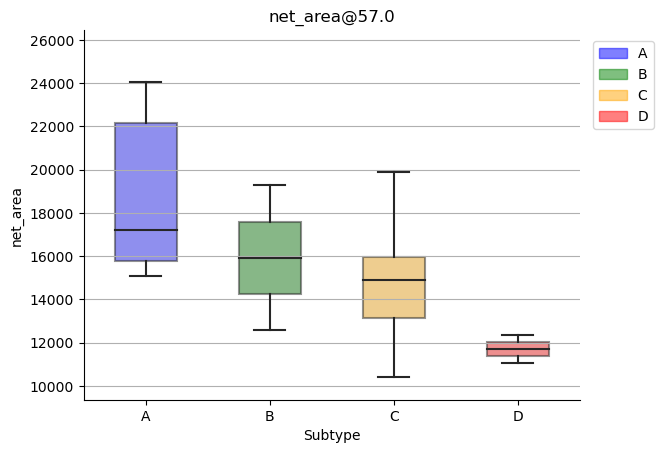

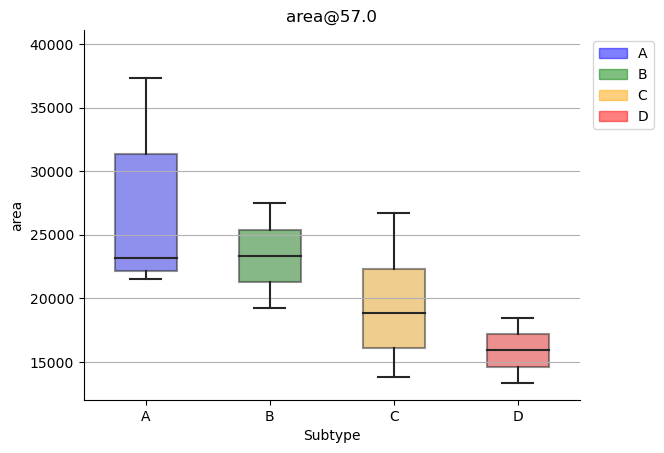

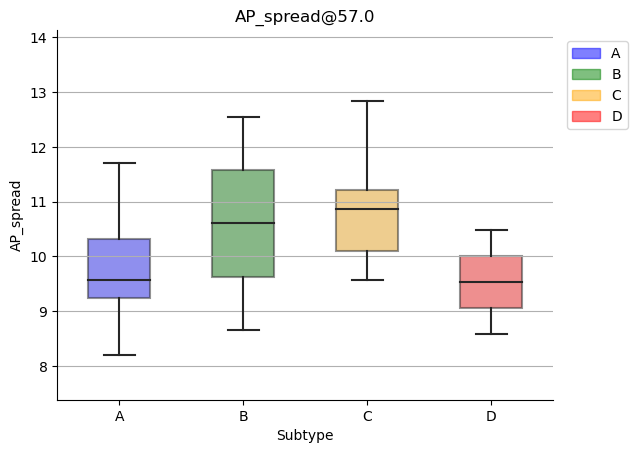

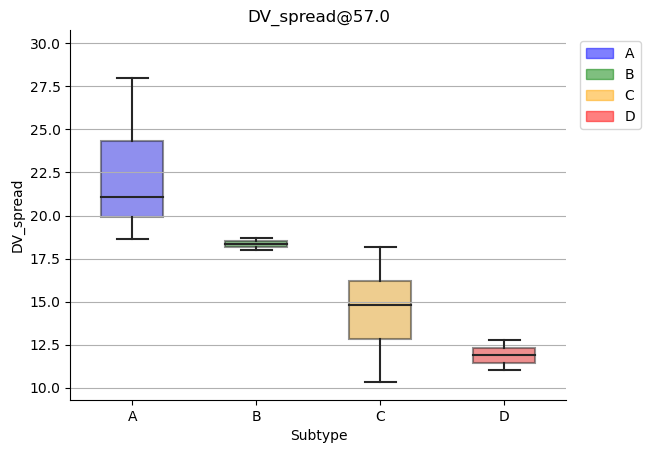

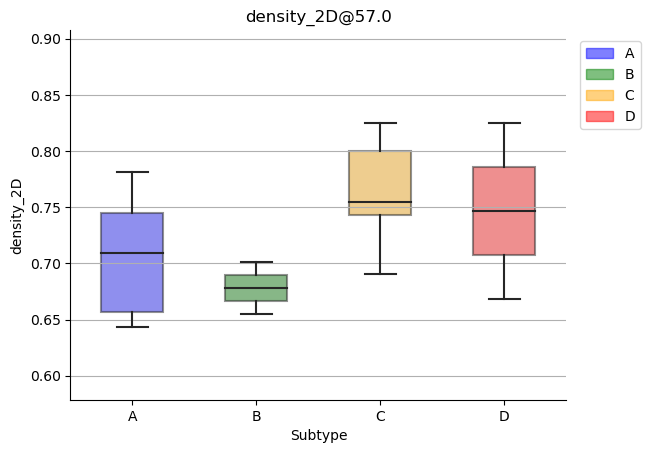

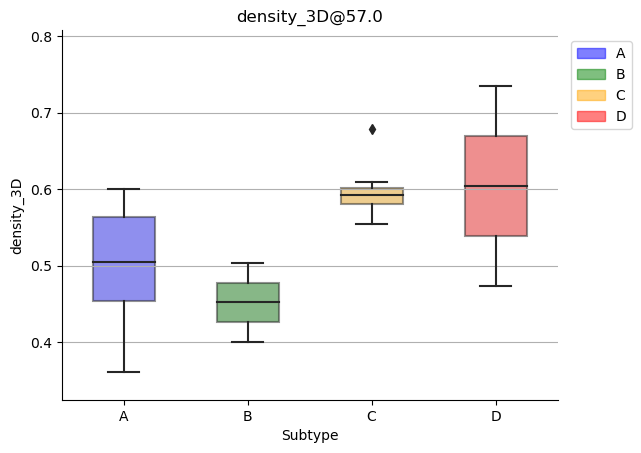

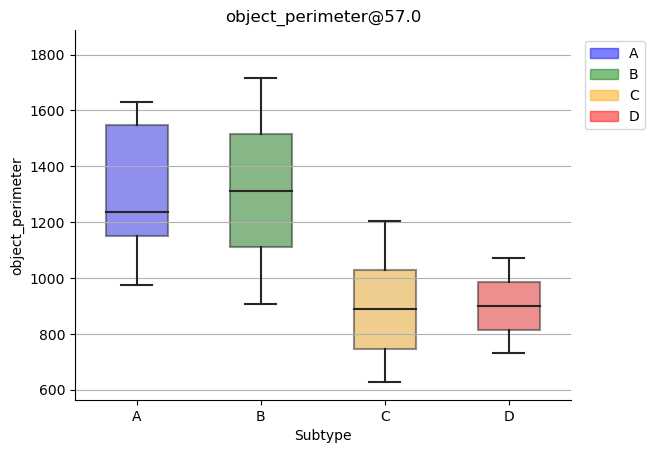

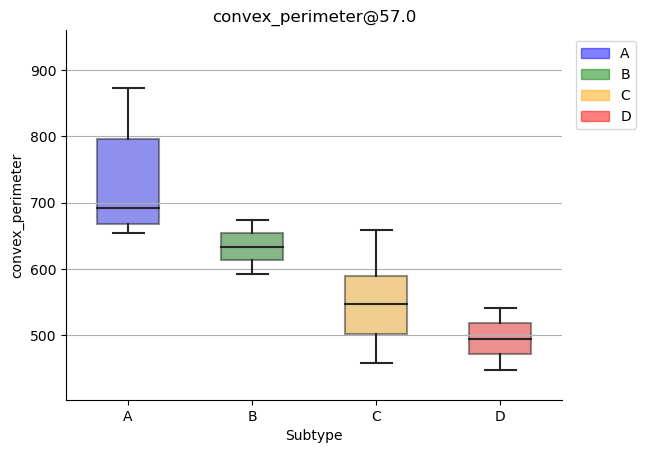

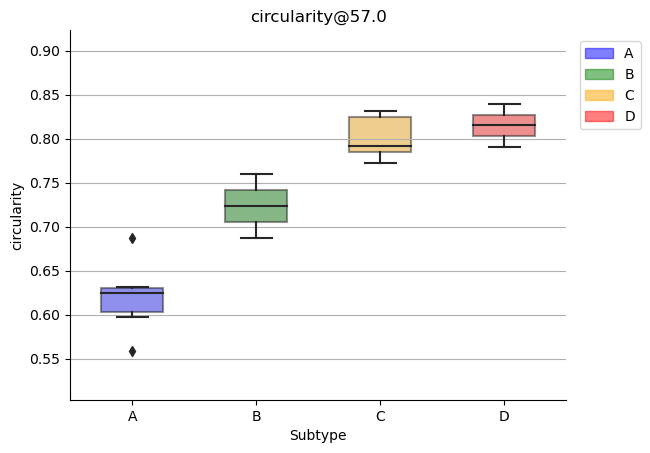

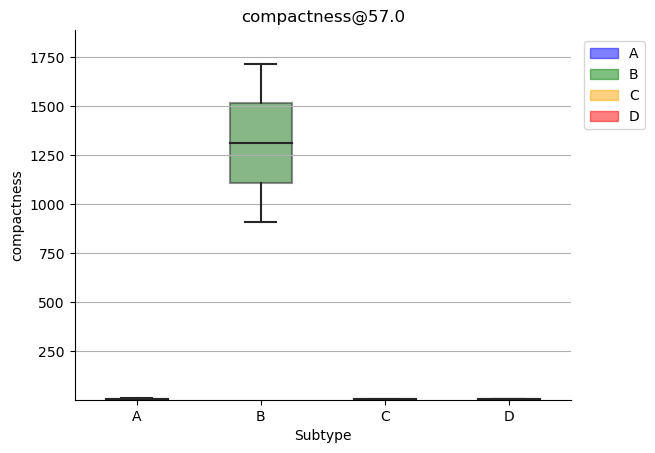

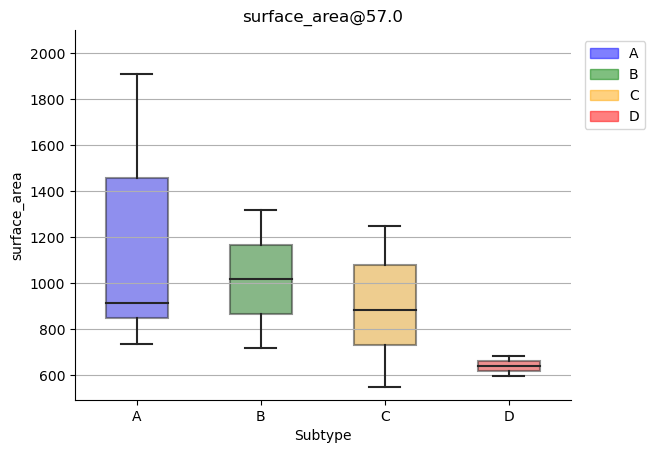

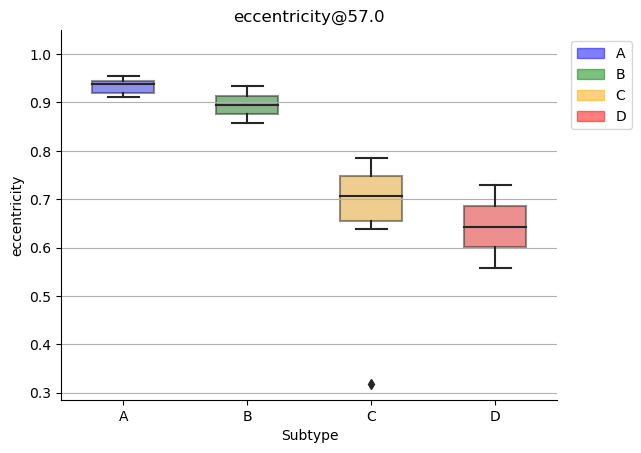

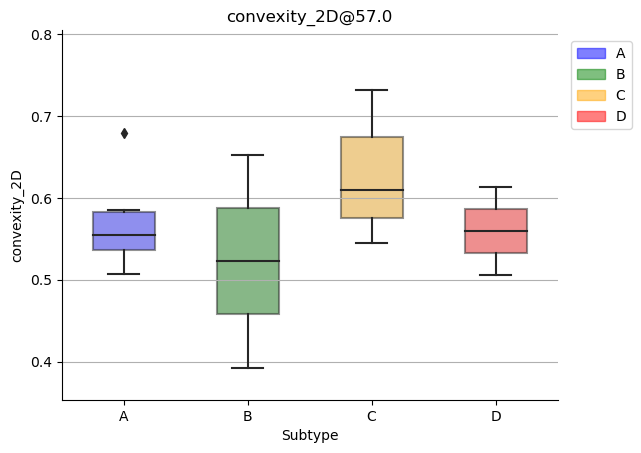

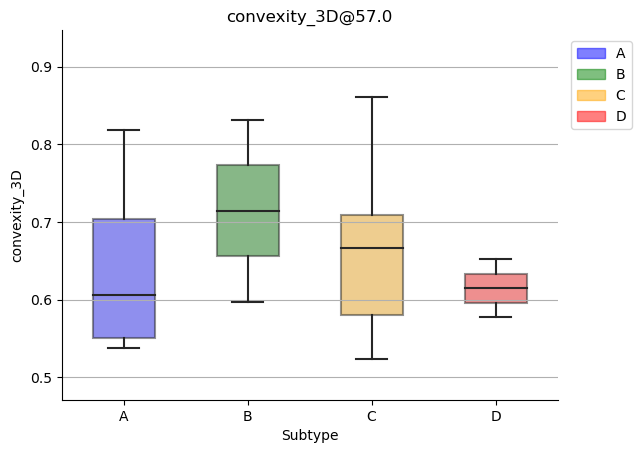

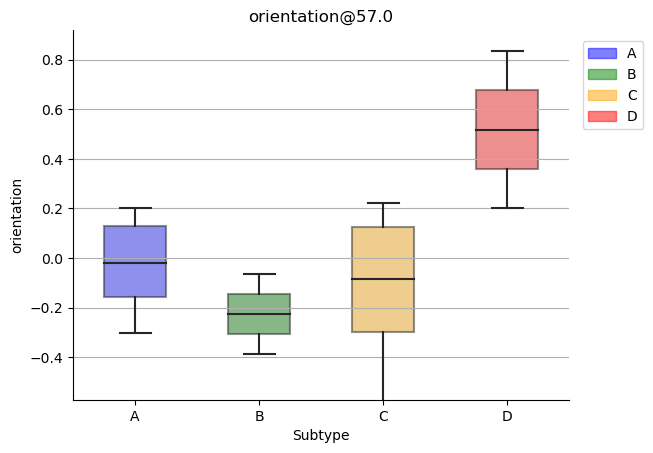

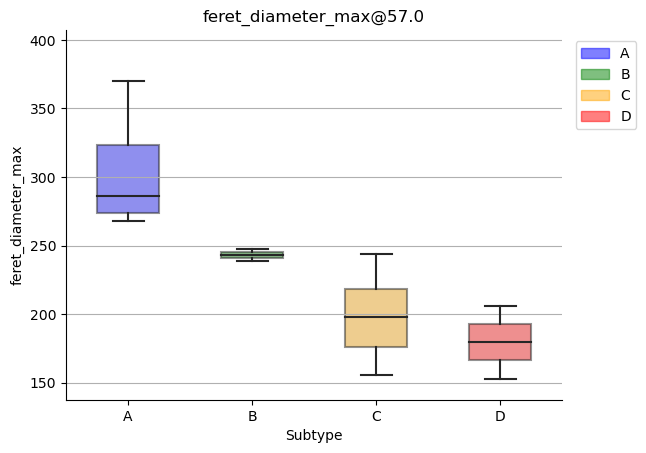

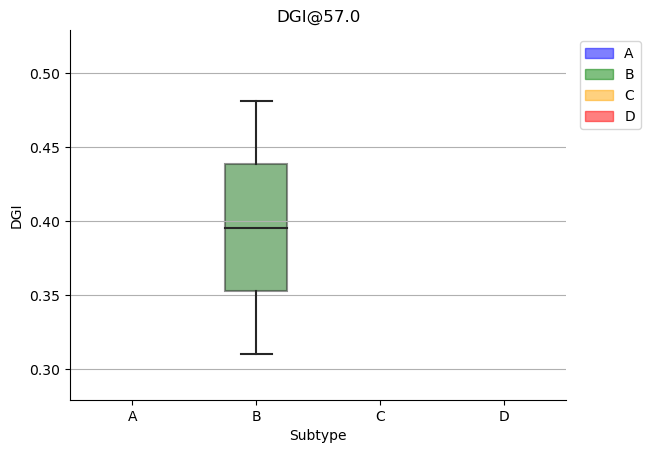

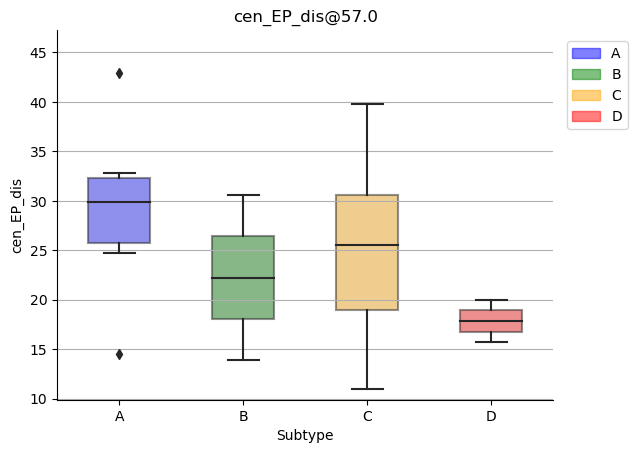

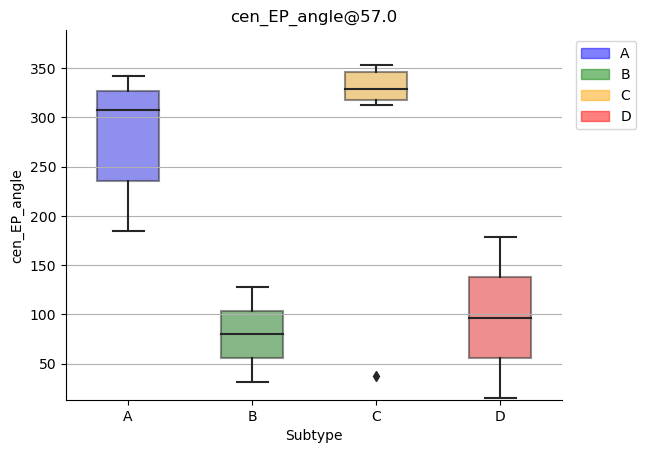

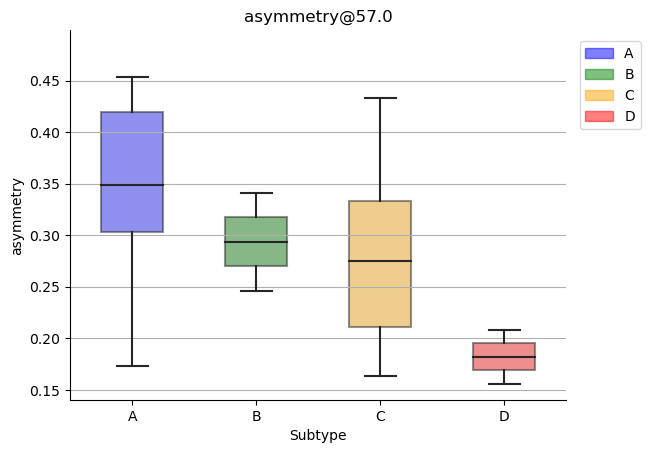

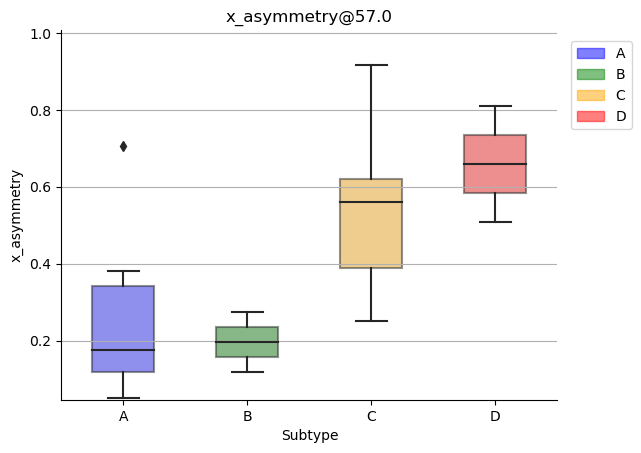

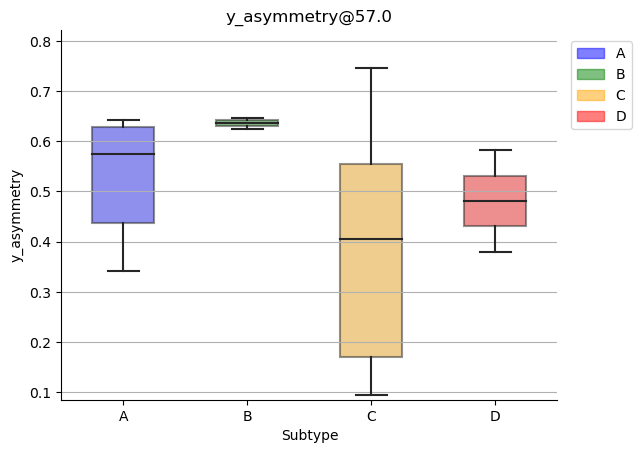

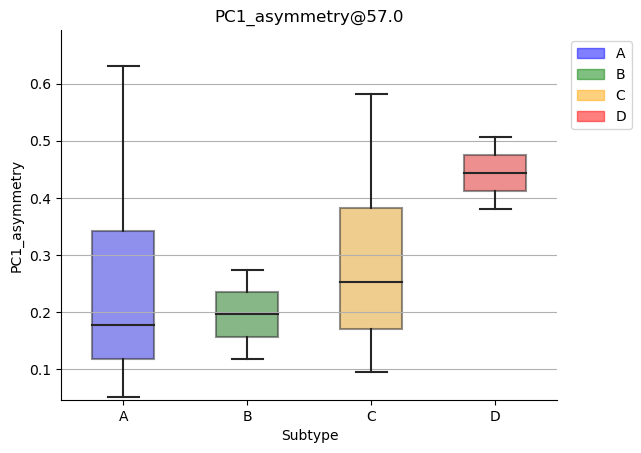

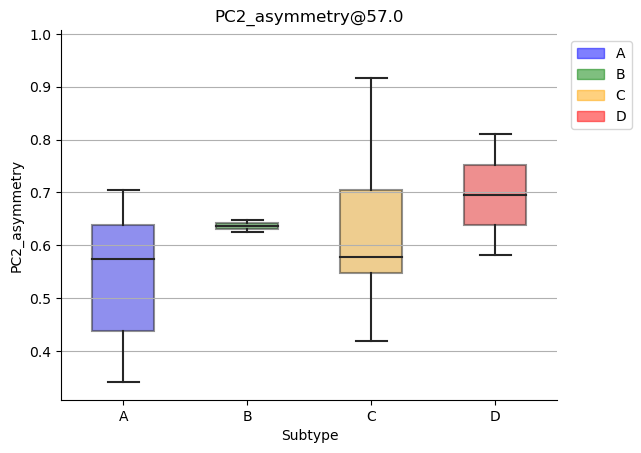

In [8]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
for plot_col in plot_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
        temp_df = temp_df.rename(columns={plot_col:neu_name})
        collective_results = pd.merge(collective_results, temp_df, on='timepoint')
    
    y_vals = collective_results.loc[Plot_t]
    del collective_results
    neu_names = list(y_vals.keys()[1:])
    neu_types = [neu.split('_s')[1][0] for neu in neu_names]
    val_col_name = plot_col+'@'+str(y_vals['timepoint'])
    plot_df = {'neu_name':neu_names, 'subtype':neu_types, 
                val_col_name:y_vals[1:]}
    plot_df = pd.DataFrame(plot_df)
    # plot_df.index = range(len(neu_names))
    fig, ax = plt.subplots(1)
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=plot_df.subtype, y=plot_df[val_col_name], 
                order=plt_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)
    ax.set_title(val_col_name)
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = val_col_name+'hAPF.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)


/tmp/ipykernel_805984/2602430472.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hori_subset['mean_'+plot_col] = Hori_subset.mean(axis = 1)
/tmp/ipykernel_805984/2602430472.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hori_subset['std_'+plot_col] = Hori_subset.std(axis = 1)
/tmp/ipykernel_805984/2602430472.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

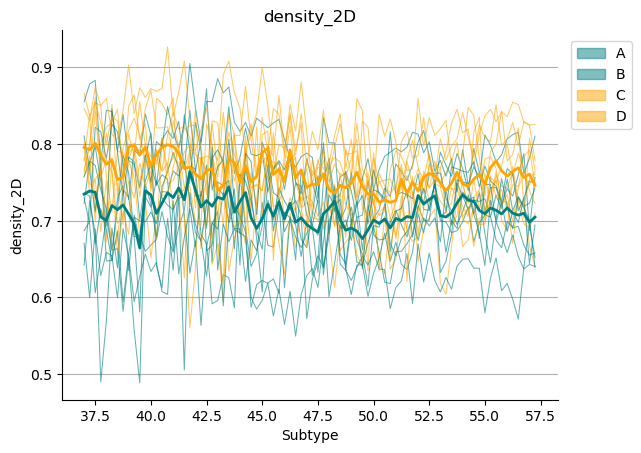

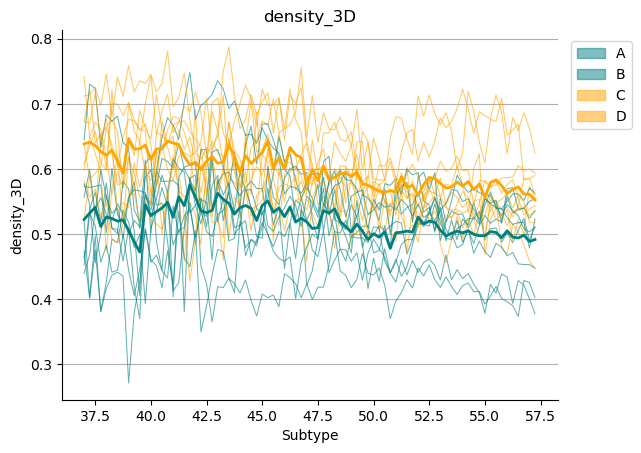

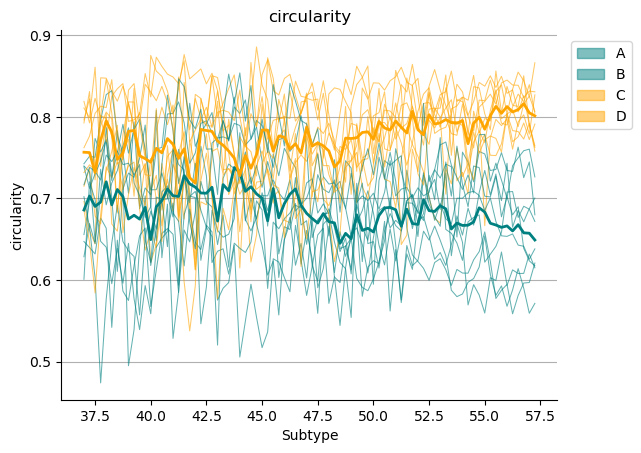

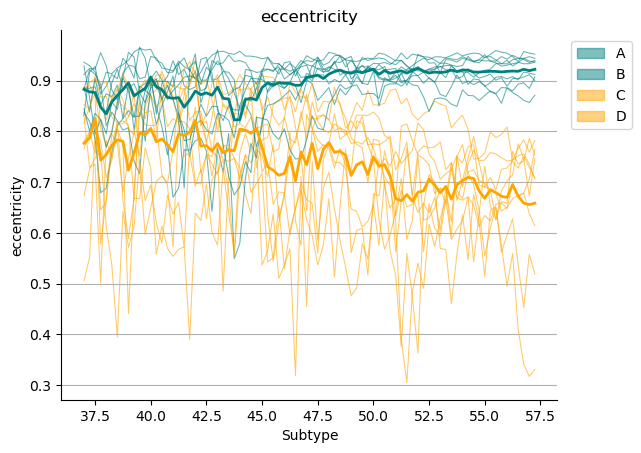

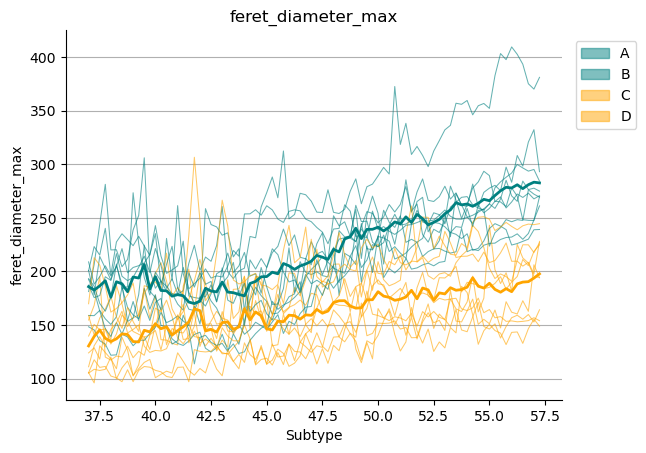

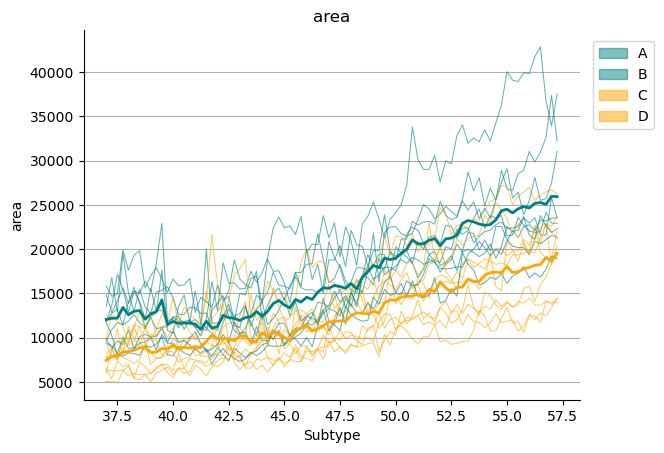

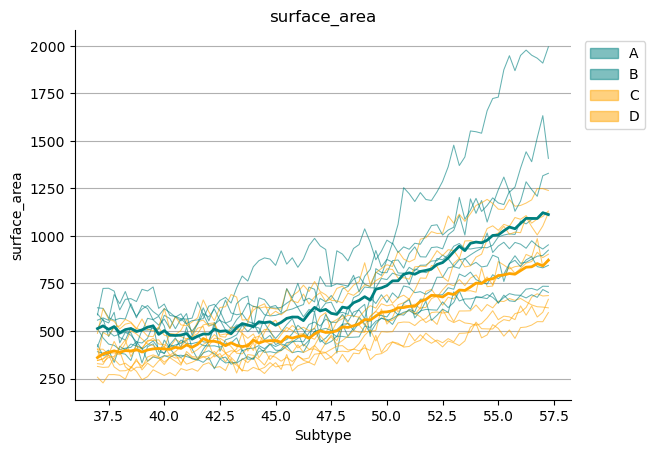

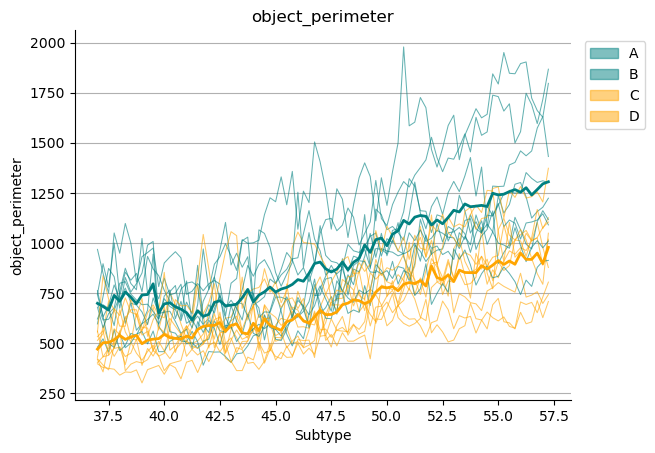

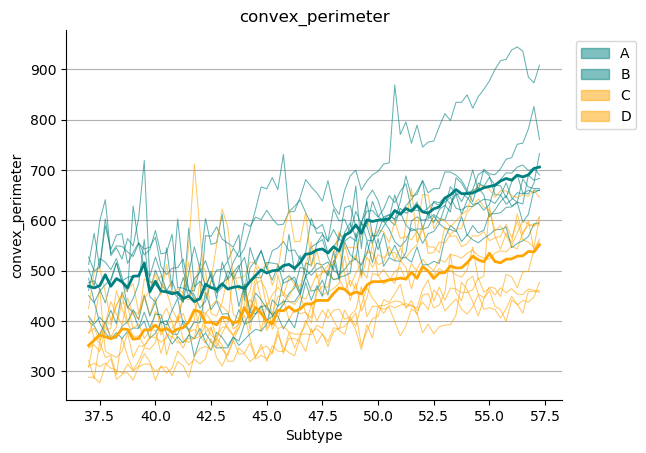

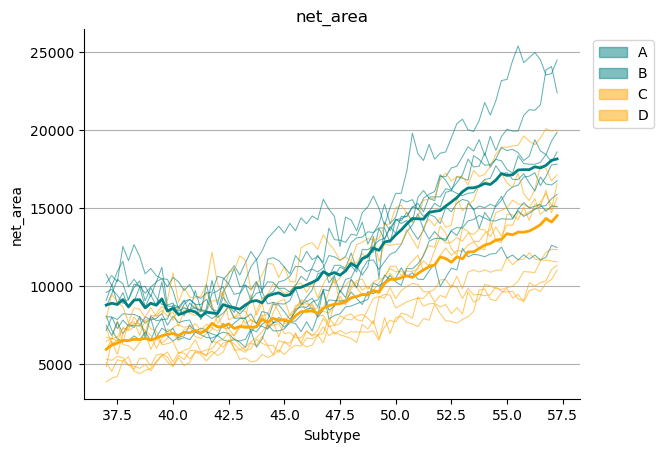

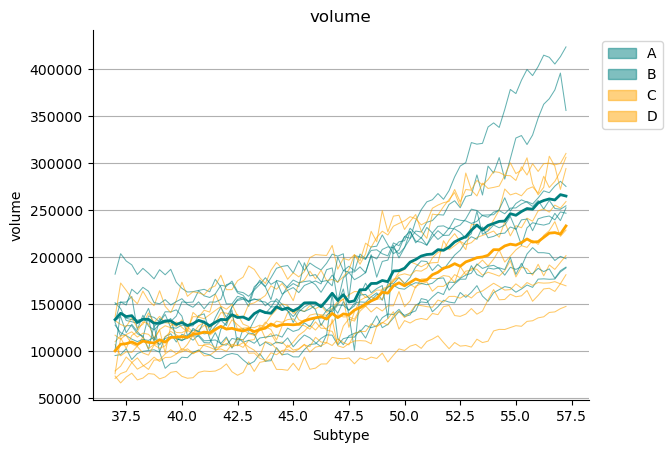

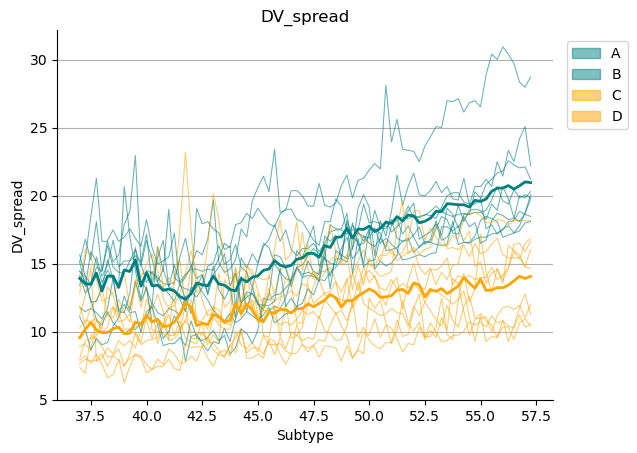

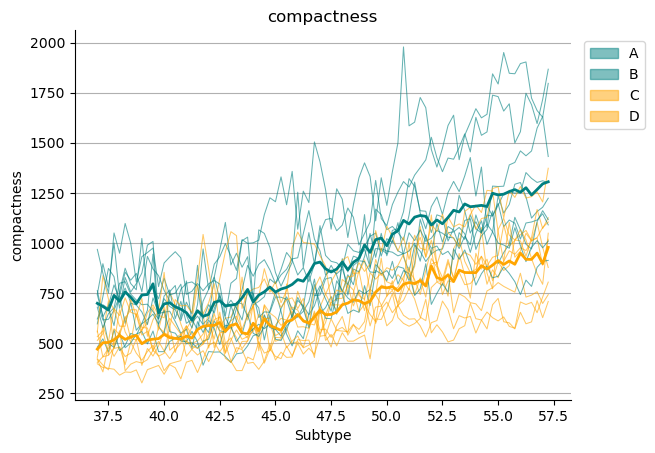

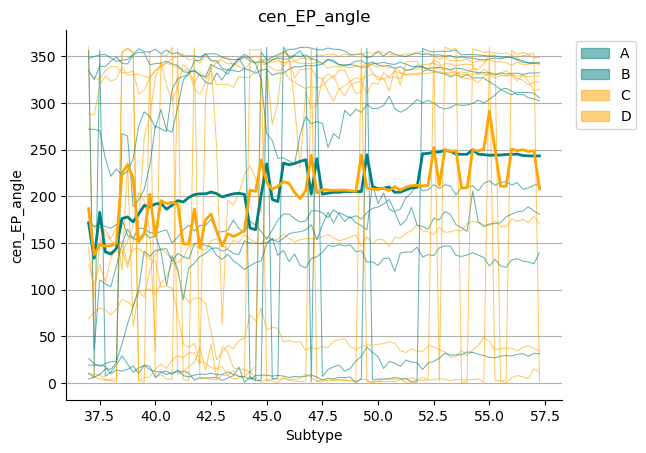

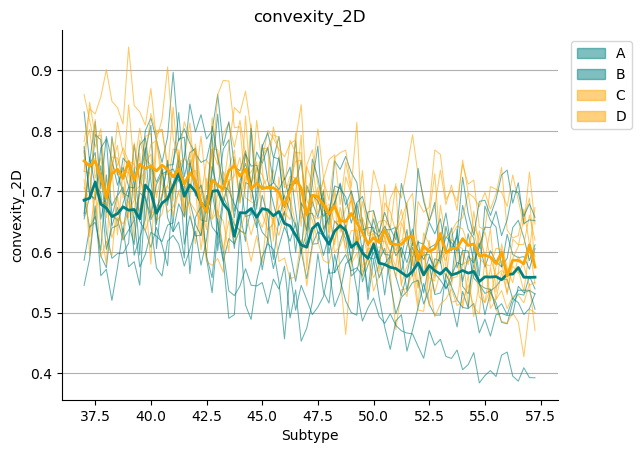

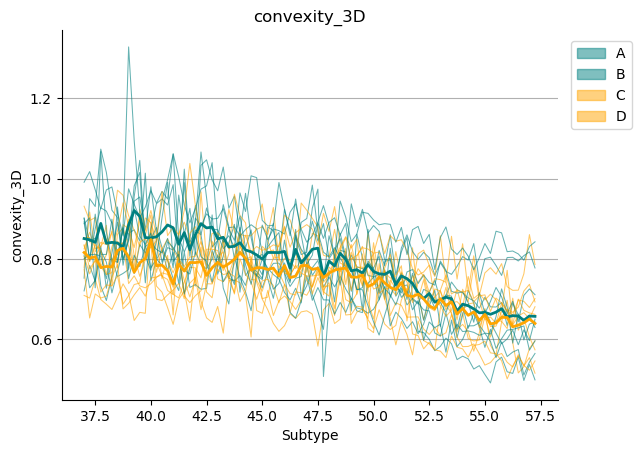

In [33]:
Colors = {'A':'teal','B':'teal','C':'orange','D':'orange'}
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)

plt_order = ['A', 'B', 'C', 'D']
for plot_col in time_plots:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
        temp_df = temp_df.rename(columns={plot_col:neu_name})
        results = pd.merge(results, temp_df, on='timepoint')
    
    Hori_subset = neu_types[(neu_types.neu_type == 'A') | (neu_types.neu_type == 'B')]
    Hori_subset = results[Hori_subset.neu_name]
    Hori_subset['mean_'+plot_col] = Hori_subset.mean(axis = 1)
    Hori_subset['std_'+plot_col] = Hori_subset.std(axis = 1)

    Vert_subset = neu_types[(neu_types.neu_type == 'C') | (neu_types.neu_type == 'D')]
    Vert_subset = results[Vert_subset.neu_name]
    Vert_subset['mean_'+plot_col] = Vert_subset.mean(axis = 1)
    Vert_subset['std_'+plot_col] = Vert_subset.std(axis = 1)

    neu_names = list(results.loc[:, results.columns != 'timepoint'].columns)
    fig, ax = plt.subplots(1)
    
    for neu in neu_names:
        # name = path.splitext(path.basename(neu))[0]
        subtype = neu.split('_s')[1]
        plt.plot(results.timepoint,results[neu],c=Colors[subtype], alpha=0.6, linewidth=0.75)
    plt.plot(results.timepoint, Hori_subset['mean_'+plot_col], c='teal', alpha=1, linewidth=2)
    plt.plot(results.timepoint, Vert_subset['mean_'+plot_col], c='orange', alpha=1, linewidth=2)
    ax.set_title(plot_col)
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_overtime.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

/tmp/ipykernel_805984/264497491.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hori_subset['mean_'+plot_col] = Hori_subset.mean(axis = 1)
/tmp/ipykernel_805984/264497491.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hori_subset['std_'+plot_col] = Hori_subset.std(axis = 1)
/tmp/ipykernel_805984/264497491.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

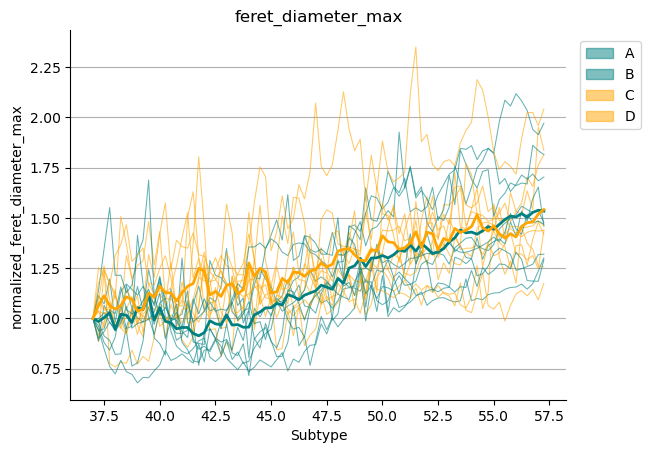

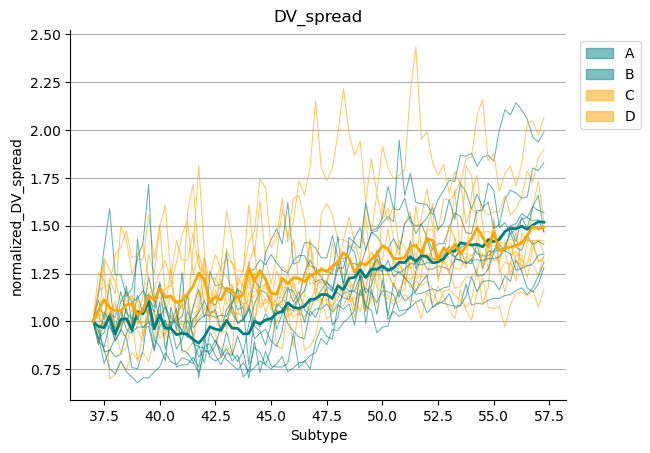

In [32]:
Colors = {'A':'teal','B':'teal','C':'orange','D':'orange'}
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)

plt_order = ['A', 'B', 'C', 'D']
for plot_col in norm_T_plots:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
        temp_df = temp_df.rename(columns={plot_col:neu_name})
        results = pd.merge(results, temp_df, on='timepoint')
    
    # normalize all timepoints based on T0, use the following line 
    results.loc[:, results.columns != 'timepoint'] = results.loc[:, 
                                                    results.columns != 'timepoint'].div(results.loc[0, 
                                                                                        results.columns != 'timepoint'])

    Hori_subset = neu_types[(neu_types.neu_type == 'A') | (neu_types.neu_type == 'B')]
    Hori_subset = results[Hori_subset.neu_name]
    Hori_subset['mean_'+plot_col] = Hori_subset.mean(axis = 1)
    Hori_subset['std_'+plot_col] = Hori_subset.std(axis = 1)

    Vert_subset = neu_types[(neu_types.neu_type == 'C') | (neu_types.neu_type == 'D')]
    Vert_subset = results[Vert_subset.neu_name]
    Vert_subset['mean_'+plot_col] = Vert_subset.mean(axis = 1)
    Vert_subset['std_'+plot_col] = Vert_subset.std(axis = 1)

    neu_names = list(results.loc[:, results.columns != 'timepoint'].columns)
    fig, ax = plt.subplots(1)
    
    for neu in neu_names:
        # name = path.splitext(path.basename(neu))[0]
        subtype = neu.split('_s')[1]
        plt.plot(results.timepoint,results[neu],c=Colors[subtype], alpha=0.6, linewidth=0.75)
    plt.plot(results.timepoint, Hori_subset['mean_'+plot_col], c='teal', alpha=1, linewidth=2)
    plt.plot(results.timepoint, Vert_subset['mean_'+plot_col], c='orange', alpha=1, linewidth=2)
    ax.set_title(plot_col)
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel('normalized_'+plot_col)
    # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_normalized_overtime.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

/tmp/ipykernel_805984/3037165492.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hori_subset['mean_'+plot_col] = Hori_subset.mean(axis = 1)
/tmp/ipykernel_805984/3037165492.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hori_subset['std_'+plot_col] = Hori_subset.std(axis = 1)
/tmp/ipykernel_805984/3037165492.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

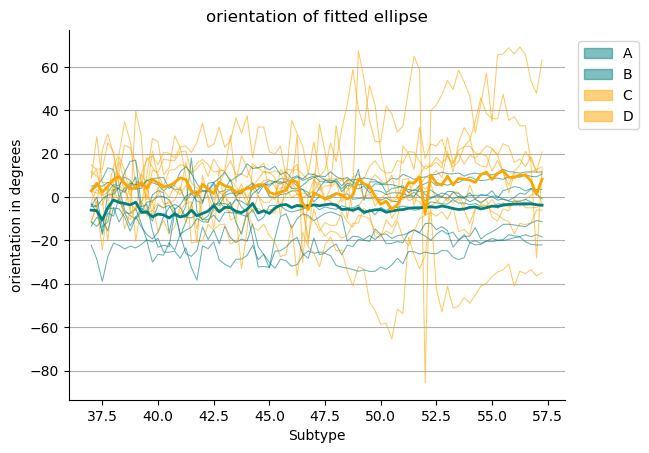

In [35]:
plot_col = 'orientation'
Colors = {'A':'teal','B':'teal','C':'orange','D':'orange'}
plt_order = ['A', 'B', 'C', 'D']

neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)

# creating a dataframe with 1 column of timepoints
timepoints = {'timepoint':np.arange(36,58,0.25)}
results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    results = pd.merge(results, temp_df, on='timepoint')

# # normalize all timepoints based on T0, use the following line 
# results.loc[:, results.columns != 'timepoint'] = results.loc[:, 
#                                                 results.columns != 'timepoint'].div(results.loc[0, 
#                                                                                     results.columns != 'timepoint'])
results.loc[:, results.columns != 'timepoint'] = results.loc[:, results.columns != 'timepoint'] * (180/np.pi)

Hori_subset = neu_types[(neu_types.neu_type == 'A') | (neu_types.neu_type == 'B')]
Hori_subset = results[Hori_subset.neu_name]
Hori_subset['mean_'+plot_col] = Hori_subset.mean(axis = 1)
Hori_subset['std_'+plot_col] = Hori_subset.std(axis = 1)

Vert_subset = neu_types[(neu_types.neu_type == 'C') | (neu_types.neu_type == 'D')]
Vert_subset = results[Vert_subset.neu_name]
Vert_subset['mean_'+plot_col] = Vert_subset.mean(axis = 1)
Vert_subset['std_'+plot_col] = Vert_subset.std(axis = 1)

neu_names = list(results.loc[:, results.columns != 'timepoint'].columns)
fig, ax = plt.subplots(1)

for neu in neu_names:
    # name = path.splitext(path.basename(neu))[0]
    subtype = neu.split('_s')[1]
    plt.plot(results.timepoint,results[neu],c=Colors[subtype], alpha=0.6, linewidth=0.75)
plt.plot(results.timepoint, Hori_subset['mean_'+plot_col], c='teal', alpha=1, linewidth=2)
plt.plot(results.timepoint, Vert_subset['mean_'+plot_col], c='orange', alpha=1, linewidth=2)
ax.set_title(plot_col+' of fitted ellipse')
ax.yaxis.grid(True)
ax.set_xlabel('Subtype')
ax.set_ylabel(plot_col+' in degrees')
# ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
sns.despine()
legend_patches = []
for subtype,color in Colors.items():
    legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
            loc=1, borderaxespad=0., prop={'size': 10})
plot_name = plot_col+'_overtime.pdf'
plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

In [62]:
plot_cols = ['centroidY', 'centroidX']
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)

# creating a dataframe with 1 column of timepoints
timepoints = {'timepoint':np.arange(36,58,0.25)}
results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for i, file in enumerate(output_files):
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = plot_cols)
    temp_df = {neu_name:temp_df.iloc[-1]-temp_df.iloc[0]}
    # if i > 0:
    # results = pd.merge(results, temp_df, on='timepoint')

    

AttributeError: 'dict' object has no attribute 'T'

In [61]:
pd.DataFrame(temp_df).T

centroidY  centroidX
211011_P37_N1_sB  -31.85731 -26.084074

In [41]:
temp_df.iloc[0]

timepoint     37.000000
centroidY    170.725667
centroidX    206.443814
Name: 0, dtype: float64

In [13]:
for plot_col in plot_2D_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results_X = pd.DataFrame(timepoints)
    collective_results_Y = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[0]])
        temp_df = temp_df.rename(columns={plot_col[0]:neu_name})
        collective_results_X = pd.merge(collective_results_X, temp_df, on='timepoint')
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[1]])
        temp_df = temp_df.rename(columns={plot_col[1]:neu_name})
        collective_results_Y = pd.merge(collective_results_Y, temp_df, on='timepoint')
    x_vals = collective_results_X.loc[Plot_t]
    y_vals = collective_results_Y.loc[Plot_t]
    

In [94]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
for plot_col in plot_2D_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[1]])
        temp_df = temp_df.rename(columns={plot_col[1]:neu_name})
        collective_results = pd.merge(collective_results, temp_df, on='timepoint')
    
    y_vals = collective_results.loc[Plot_t]

In [ ]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('_output.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

In [ ]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    my_order = ['A', 'B', 'C', 'D']
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=results_df.subtype, y=results_df[plot_col], 
                order=my_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

In [5]:
results_df = pd.read_csv(data_path, index_col=0)

In [6]:
results_df.head()

neuron subtype    entry_point  volume  net_area   area  AP_spread  \
0  T4-02       A  [ 11 347 337]  108849     14980  27964        146   
1  T4-03       D  [ 22 651 367]  108692     17030  38753        159   
2  T4-04       B  [ 18 569 625]  186473     21180  43348        167   
3  T4-05       D  [ 10 666 452]  170394     22127  51284        207   
4  T4-06       D  [ 15 441 368]  168232     20893  43249        155   

   DV_spread  density_2D  density_3D  ...    yP_scale   yP_angle  \
0        267    0.535689    0.363586  ...  146.971715 -99.687679   
1        336    0.439450    0.219961  ...   91.193838 -86.747302   
2        352    0.488604    0.289973  ...  146.007427 -91.955341   
3        367    0.431460    0.215020  ...   95.363716 -81.309100   
4        367    0.483086    0.240248  ...  106.038768 -80.571119   

                                       yP_xy  yN_weight    yN_scale  \
0  (-0.0964996688972741, 0.5652782239136788)   0.003842 -112.013844   
1   (0.5951072459657829, 10.471458819771144)   0.526327 -246.534458   
2  (-0.28542086865273697, 8.360211519175595)   0.074719 -205.685251   
3    (1.613308582059392, 10.554229281046819)   0.549541 -282.230528   
4    (2.1034614700853624, 12.66635343034258)   0.467388 -259.251018   

     yN_angle                                       yN_xy   PCA_angle  \
0 -279.687679  (0.07241650660220049, -0.4242032610257114)   -9.687679   
1 -266.747302  (-7.3624309385526585, -129.54873749074792) -266.747302   
2 -271.955341    (0.5243854677985635, -15.35968077271772) -181.955341   
3 -261.309100  (-23.435768901607982, -153.31628500324416) -261.309100   
4 -260.571119  (-19.850616474093734, -119.53388623792972) -260.571119   

                                       PCA_xy  \
0      (39.34590188342817, 6.716810136304233)   
1  (-7.3624309385526585, -129.54873749074792)   
2   (-104.21433415715065, -3.557917848486889)   
3  (-23.435768901607982, -153.31628500324416)   
4  (-19.850616474093734, -119.53388623792972)   

                          PCA_shift_centroid  
0     (4.393954512209415, 21.89753021929927)  
1  (-83.91317987304318, -6.3473051991717675)  
2   (-16.921708624837933, -47.9081530700065)  
3  (-97.30143836713606, -15.992372805863232)  
4    (-82.37215767197284, 0.870859272895592)  

[5 rows x 51 columns]

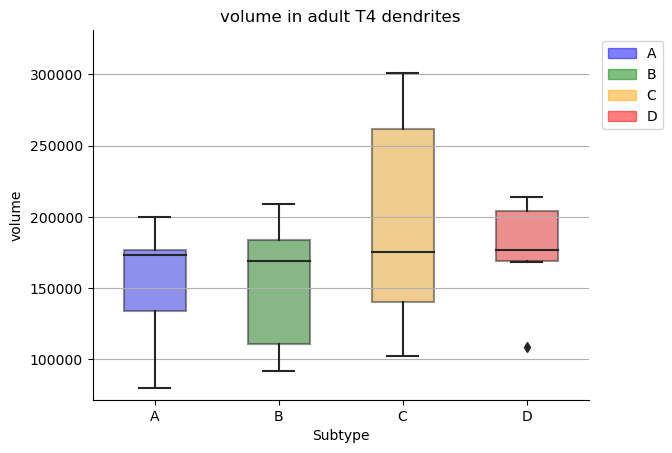

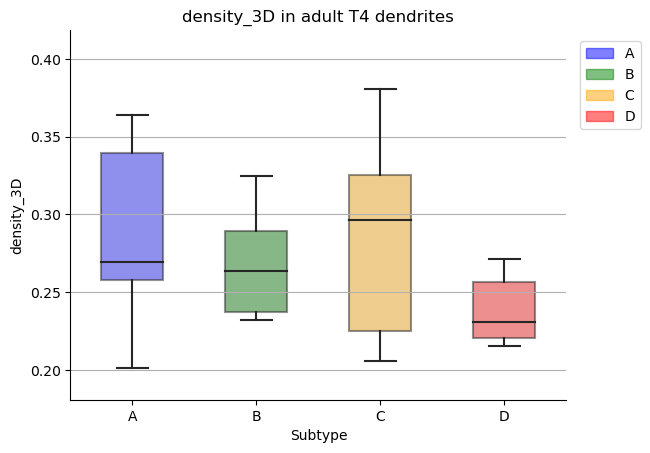

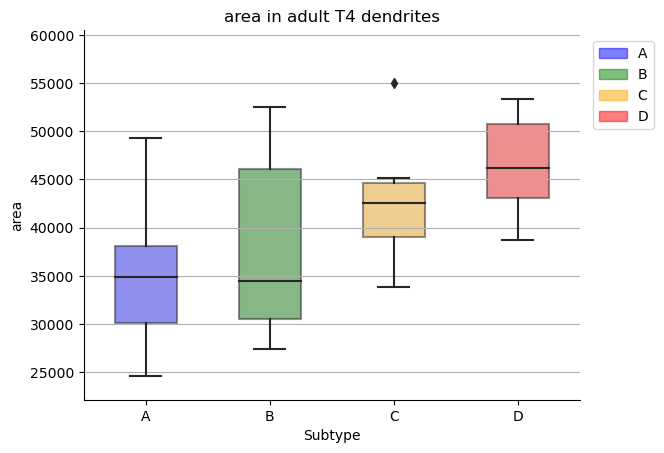

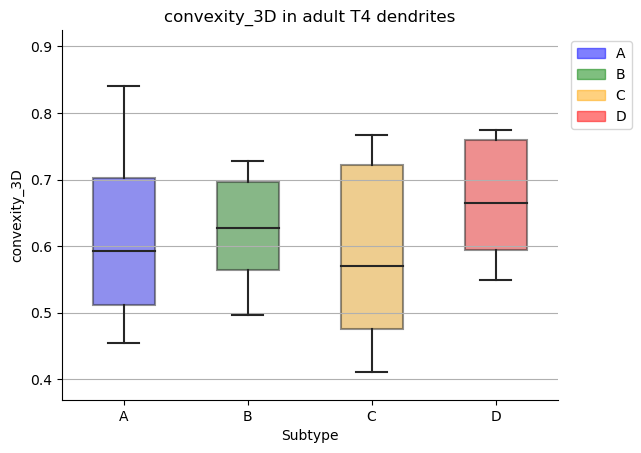

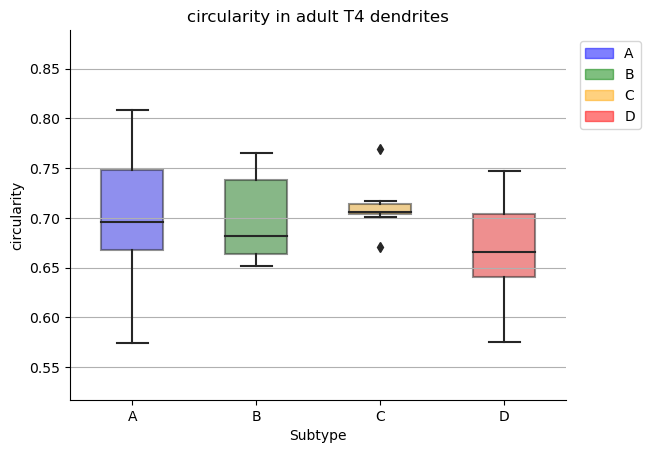

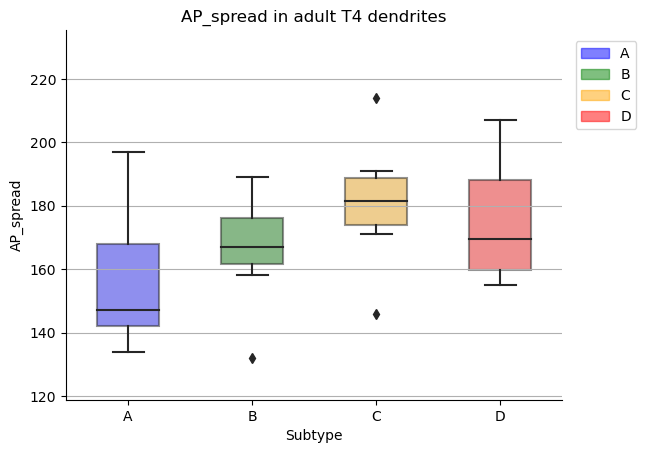

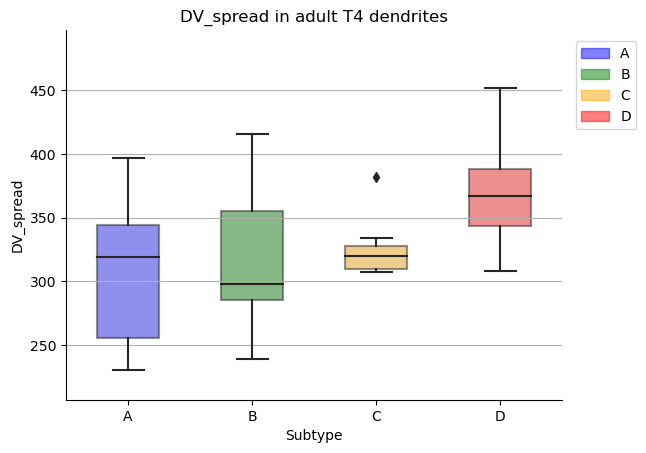

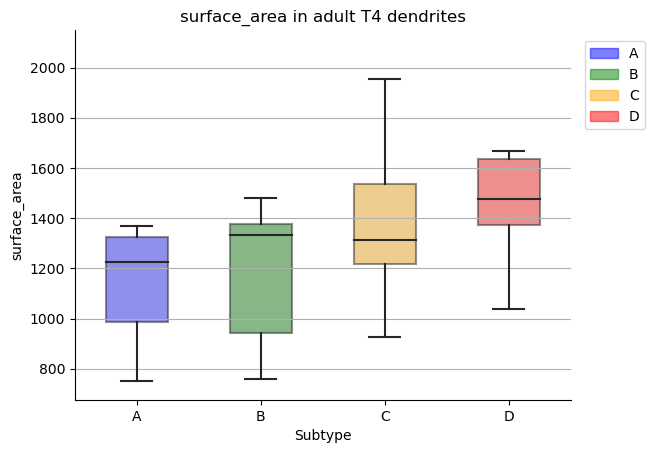

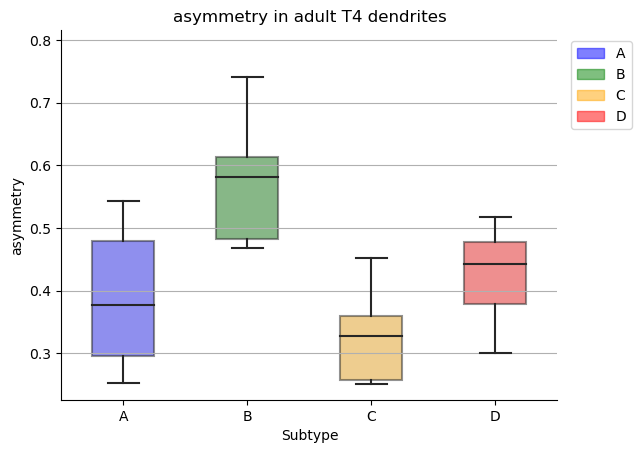

In [7]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    my_order = ['A', 'B', 'C', 'D']
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=results_df.subtype, y=results_df[plot_col], 
                order=my_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

NameError: name 'x_p' is not defined

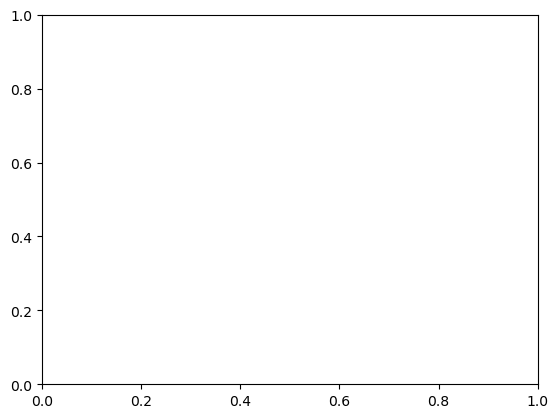

In [8]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    # y_vals = results_df.convexity_3D
    for neu,color in Colors.items():
        subset = results_df[plot_col][results_df.subtype==neu]
        violin_parts =  ax.violinplot(subset, positions=[x_p[neu]], vert=True, widths=0.5, 
                                    showmeans=False, showextrema=True, showmedians=False, 
                                    quantiles=[0.5], bw_method=None)
        # for pc in violin_parts['bodies']:
        #     pc.set_facecolor(color)
        #     pc.set_edgecolor(color)

    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    # plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

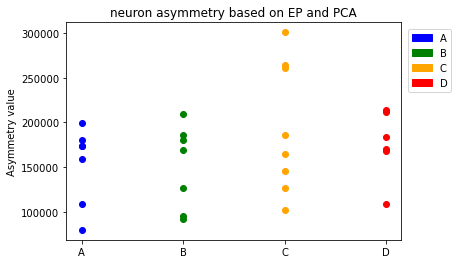

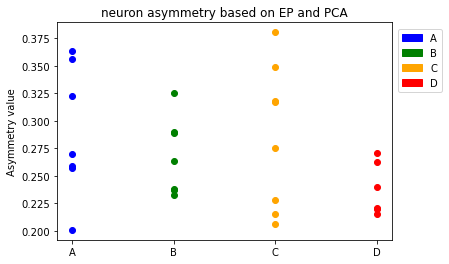

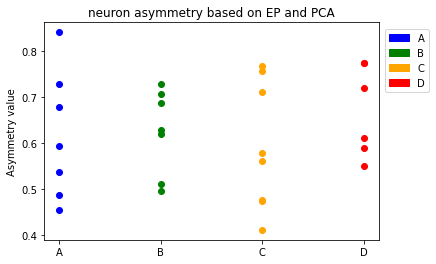

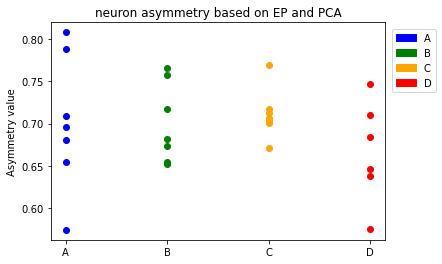

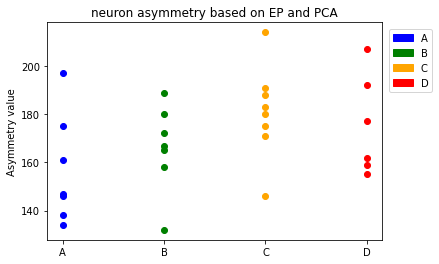

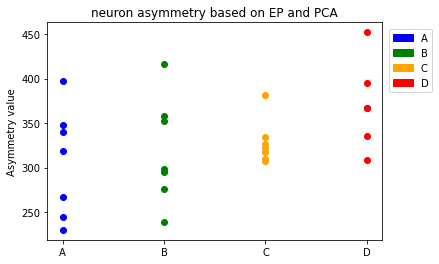

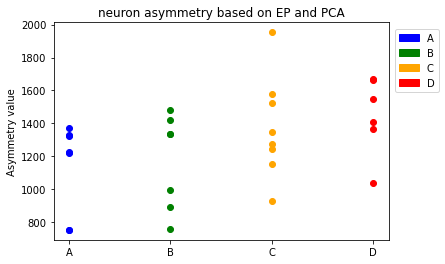

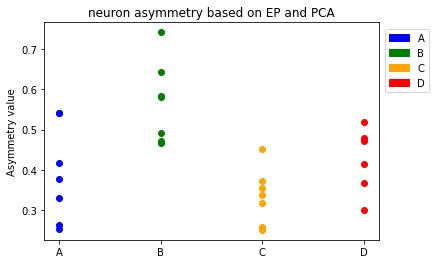

In [ ]:
# for violin plot of Y_value grouped by subtype on the x_axis
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    colors = {'A':'b','B':'g','C':'orange','D':'r'}
    x_p = {'A':1,'B':2,'C':3,'D':4}
    y_vals = results_df[plot_col]
    for i,neu in enumerate(y_vals):
        ax.scatter(x_p[results_df.subtype[i]],neu,c=colors[results_df.subtype[i]])
    
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    # plt.savefig(save_path+'adult_T4_Asymmetry.png', facecolor='white', transparent=False)

/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')
/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')


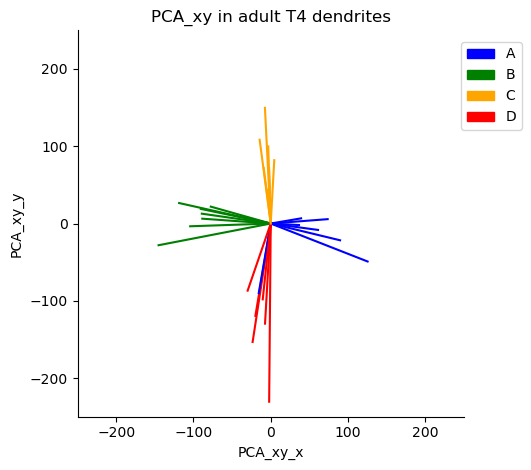

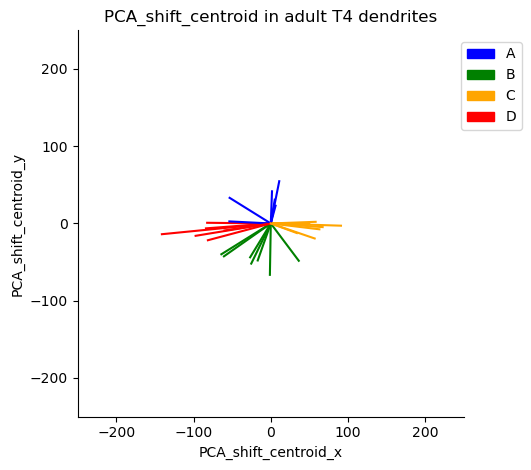

In [9]:
# To plot x,y value of one metric for individual neurons, colored by subtype
for plot_col in line_plots_to_do:
    fig, ax = plt.subplots(1)
    col_vals = results_df[plot_col]
    for i in ['(',')','[',']']:
        col_vals = col_vals.str.replace(i,'')
    col_vals = col_vals.str.split(',')
    for i, val in col_vals.items():
        col_vals[i] = [float(n) for n in val]
    for i,neu in enumerate(col_vals):
        ax.plot((0,neu[0]),(0,neu[1]),c=Colors[results_df.subtype[i]])
    
    # ax.set_ylim(1.2*y_vals.str[1].min(),1.2*y_vals.str[1].max())
    # ax.set_xlim(1.2*y_vals.str[0].min(),1.2*y_vals.str[0].max())

    ax.set_ylim(-250,250)
    ax.set_xlim(-250,250)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.set_xlabel(plot_col+'_x')
    ax.set_ylabel(plot_col+'_y')
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})

    ax.set_aspect('equal', 'box')
    fig.tight_layout()
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)